In [1]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType, IntegerType
import re
import random

spark = SparkSession.builder.config(conf=pyspark.SparkConf()).getOrCreate()
sc = spark.sparkContext 



In [4]:
# Dataframe setup

articleList = ["the", "a", "an"]

preps = spark.read.format("csv").option("header", "false").load("Inputs/prepositions.csv")
preps = (preps.withColumnRenamed('_c0', 'Prepositions'))


verbs = spark.read.format("csv").option("header", "false").load("Inputs/verbs3syl.csv")
verbs = (verbs.withColumnRenamed('_c0', '3_syl_verbs'))


nouns = spark.read.format("csv").option("header", "false").load("Inputs/nouns3syl.csv")
nouns = (nouns.withColumnRenamed('_c0', '3_syl_nouns'))

adverbs = spark.read.format("csv").option("header", "false").load("Inputs/advb3syl.csv")
adverbs = (adverbs.withColumnRenamed('_c0', 'Adverbs'))


print ("------------------------------------")
print (f"Noun count: {nouns.count()} Verb count: {verbs.count()}")
print (f"Preposition count: {preps.count()} Adverb count: {adverbs.count()}")

------------------------------------
Noun count: 20602 Verb count: 6365
Preposition count: 70 Adverb count: 1545


In [2]:
#Setup using all verbs, nouns, and adverbs

articleList = ["the", "a", "an"]

preps = spark.read.format("csv").option("header", "false").load("Inputs/prepositions.csv")
preps = (preps.withColumnRenamed('_c0', 'Prepositions'))


allVerbs = spark.read.format("csv").option("header", "false").load("Inputs/allVerbs.csv")
allVerbs = (allVerbs.withColumnRenamed('_c0', 'Verbs'))


allNouns = spark.read.format("csv").option("header", "false").load("Inputs/allNouns.csv")
allNouns = (allNouns.withColumnRenamed('_c0', 'Nouns'))

allAdverbs = spark.read.format("csv").option("header", "false").load("Inputs/allAdverbs.csv")
allAdverbs = (allAdverbs.withColumnRenamed('_c0', 'Adverbs'))

allAdjs = spark.read.format("csv").option("header", "false").load("Inputs/adj3syl.csv")
allAdjs = (allAdjs.withColumnRenamed('_c0', 'Adjectives'))

print ("------------------------------------")
print (f"Noun count: {allNouns.count()} Verb count: {allVerbs.count()}")
print (f"Preposition count: {preps.count()} Adverb count: {allAdverbs.count()}")

------------------------------------
Noun count: 90959 Verb count: 30618
Preposition count: 70 Adverb count: 6251


In [33]:
# Test to select a random verb

# randVerb = verbs.select("3_syl_verbs").rdd.takeSample(False, 1)
# verb_val = [x['3_syl_verbs'] for x in randVerb][0]

# verb_val

'preparing'

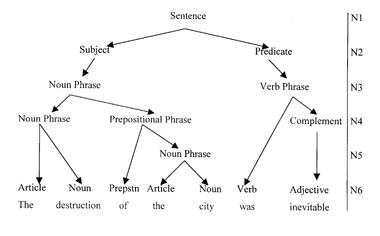

In [6]:
art_1 = random.choice(articleList)
art_2 = random.choice(articleList)

randNoun1 = nouns.select("3_syl_nouns").rdd.takeSample(False, 1)
noun_val_1 = [x['3_syl_nouns'] for x in randNoun1][0]

randNoun2 = nouns.select("3_syl_nouns").rdd.takeSample(False, 1)
noun_val_2 = [x['3_syl_nouns'] for x in randNoun2][0]

randVerb = verbs.select("3_syl_verbs").rdd.takeSample(False, 1)
verb_val = [x['3_syl_verbs'] for x in randVerb][0]

randPrep = preps.select("Prepositions").rdd.takeSample(False, 1)
prep_val = [x['Prepositions'] for x in randPrep][0]

randAdvb = adverbs.select("Adverbs").rdd.takeSample(False, 1)
advb_val = [x['Adverbs'] for x in randAdvb][0]

randoSentence = (f"{art_1.title()} {noun_val_1} {prep_val} {art_2} {noun_val_2} {verb_val} {advb_val}")

randoSentence

'A minuends anti a saluki utilized vauntingly'

In [4]:
# Sentence construction with all possible choices

art_1 = random.choice(articleList)
art_2 = random.choice(articleList)

randNoun1 = allNouns.select("Nouns").rdd.takeSample(False, 1)
noun_val_1 = [x['Nouns'] for x in randNoun1][0]

randNoun2 = allNouns.select("Nouns").rdd.takeSample(False, 1)
noun_val_2 = [x['Nouns'] for x in randNoun2][0]

randNoun3 = allNouns.select("Nouns").rdd.takeSample(False, 1)
noun_val_3 = [x['Nouns'] for x in randNoun3][0]

randVerb = allVerbs.select("Verbs").rdd.takeSample(False, 1)
verb_val = [x['Verbs'] for x in randVerb][0]

randPrep = preps.select("Prepositions").rdd.takeSample(False, 1)
prep_val = [x['Prepositions'] for x in randPrep][0]

# randAdvb = allAdverbs.select("Adverbs").rdd.takeSample(False, 1)
# advb_val = [x['Adverbs'] for x in randAdvb][0]

randAdj = allAdjs.select("Adjectives").rdd.takeSample(False, 1)
adj_val = [x['Adjectives'] for x in randAdj][0]

# randoSentence = (f"{art_1.title()} {noun_val_1} {prep_val} {art_2} {noun_val_2} {verb_val} {advb_val}")


# Article Noun Preposition Adjective Noun Verb Article Noun

randoSentence = (f"{art_1.title()} {noun_val_1} {prep_val} {adj_val} {noun_val_2} {verb_val} {art_2} {noun_val_3}")

randoSentence

'The saneness considering resemblant halibuts voting the electrotype'

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select, WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.by import By

import time

# blah = webdriver.ChromeOptions()
# blah.add_argument('headless')

# Initialize Chromedriver from the Documents folder
browser = webdriver.Chrome("C:\\Users\\abm0406\\Documents\\chromedriver.exe")

browser.get("https://datayze.com/readability-analyzer.php")

# Print the title of the web page to ensure Chromedriver is on the correct page
print (browser.title)

# testSentence = "It was the best of times, it was the worst of times."

# Add the random sentence into the analyzer field and generate results
if browser.find_element_by_id("rich_txt"):

#     print ("Text field found")

    browser.find_element_by_id("rich_txt").send_keys(randoSentence)


browser.implicitly_wait(1)
# WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.ID, "analyzeButton"))).click()

browser.find_element_by_id("analyzeButton").click()

browser.implicitly_wait(3)


# Grab statistics from the webpage
KFvalue = browser.find_element_by_id("kincaid")
DCvalue = browser.find_element_by_id("dalechall")
FREvalue = browser.find_element_by_id("flesch")
Fogvalue = browser.find_element_by_id("fog")

print("---------------------------------------------------------------------")
print (f"Flesch Reading Ease: {FREvalue.get_attribute('value')}")
print (f"Flesch-Kincaid Grade Level: {KFvalue.get_attribute('value')}")
print (f"Dale–Chall score: {DCvalue.get_attribute('value')}")
print (f"Gunning Fog Scale Level: {Fogvalue.get_attribute('value')}")

Readability Analyzer
---------------------------------------------------------------------
Flesch Reading Ease: 0
Flesch-Kincaid Grade Level: 17.03
Dale–Chall score: 13.9
Gunning Fog Scale Level: 18.2
